In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, matthews_corrcoef, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df1 = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [ ]:
df1.shape

(991346, 24)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
df1.isna().sum().sum()

0

In [ ]:
# 4.1 - Column Renaming and Value Mapping
df1['sex'].replace(['Male', 'Female'],[0,1],inplace=True)
df1.rename(columns={'sex':'female','DRK_YN':'drinking'},inplace=True)

<ipython-input-19-11637886bf09>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,7))


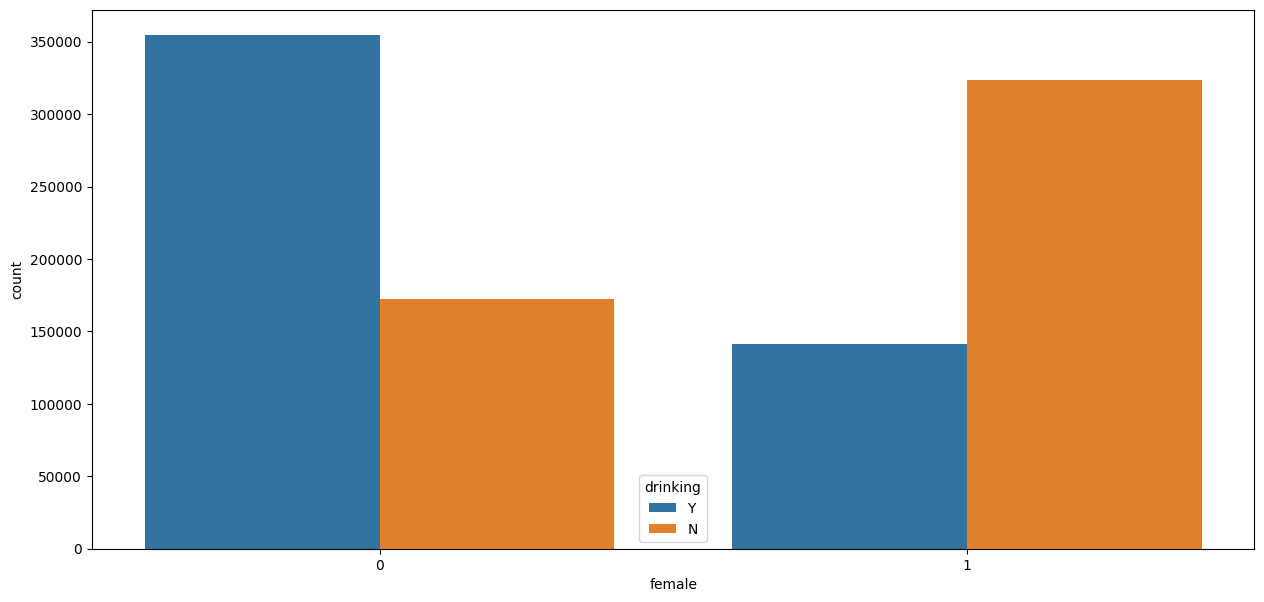

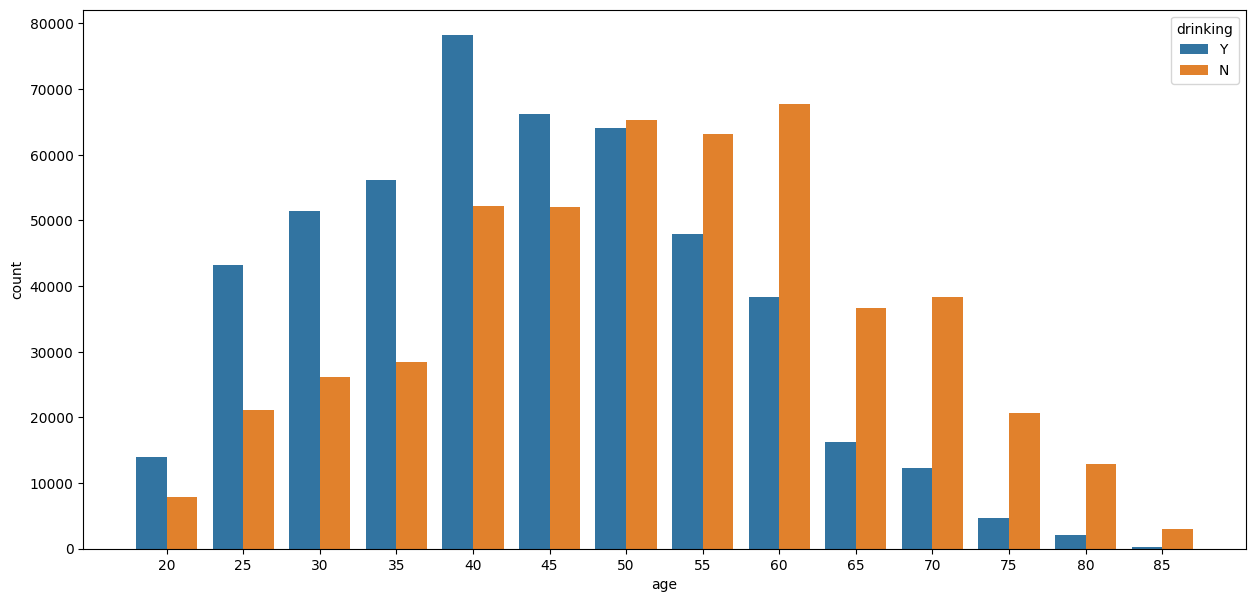

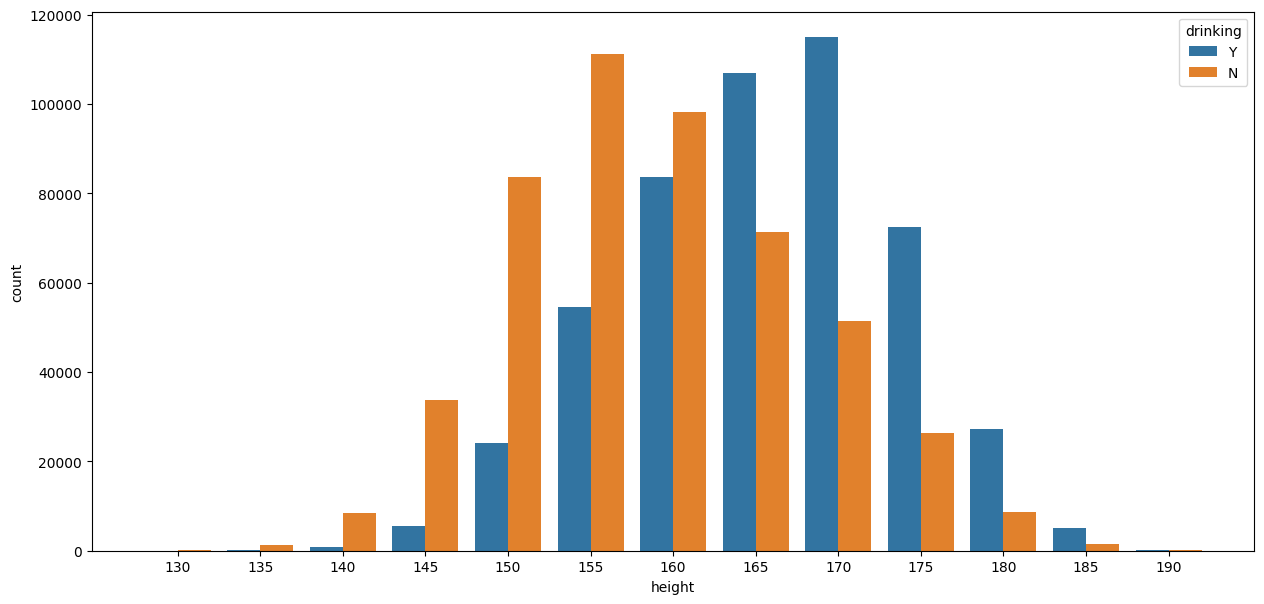

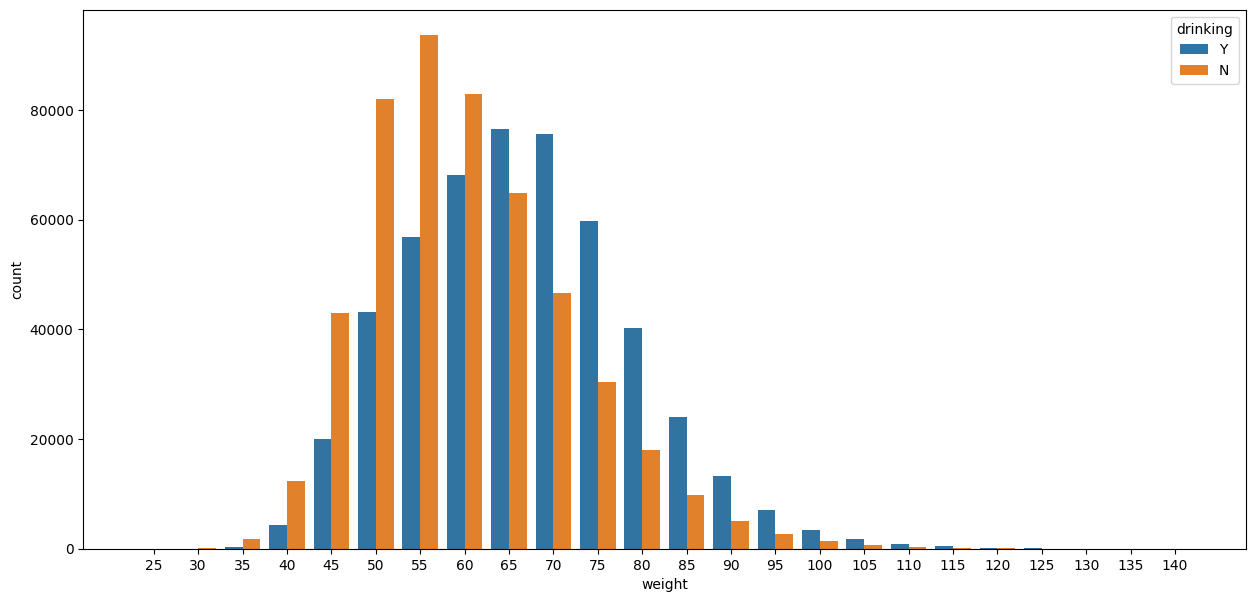

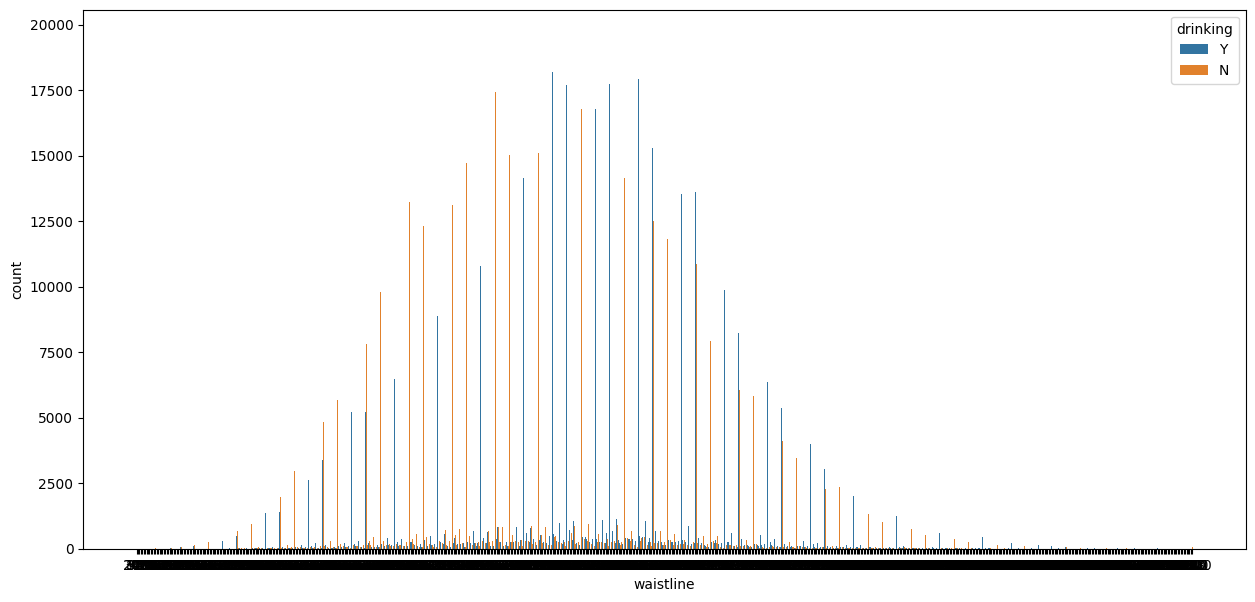

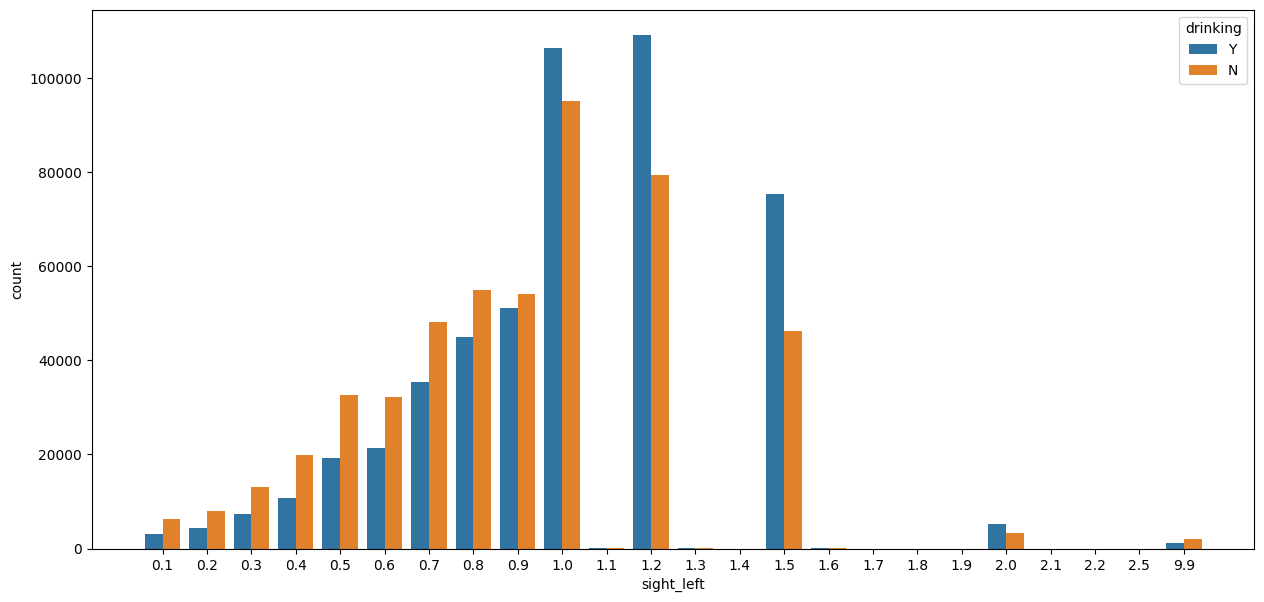

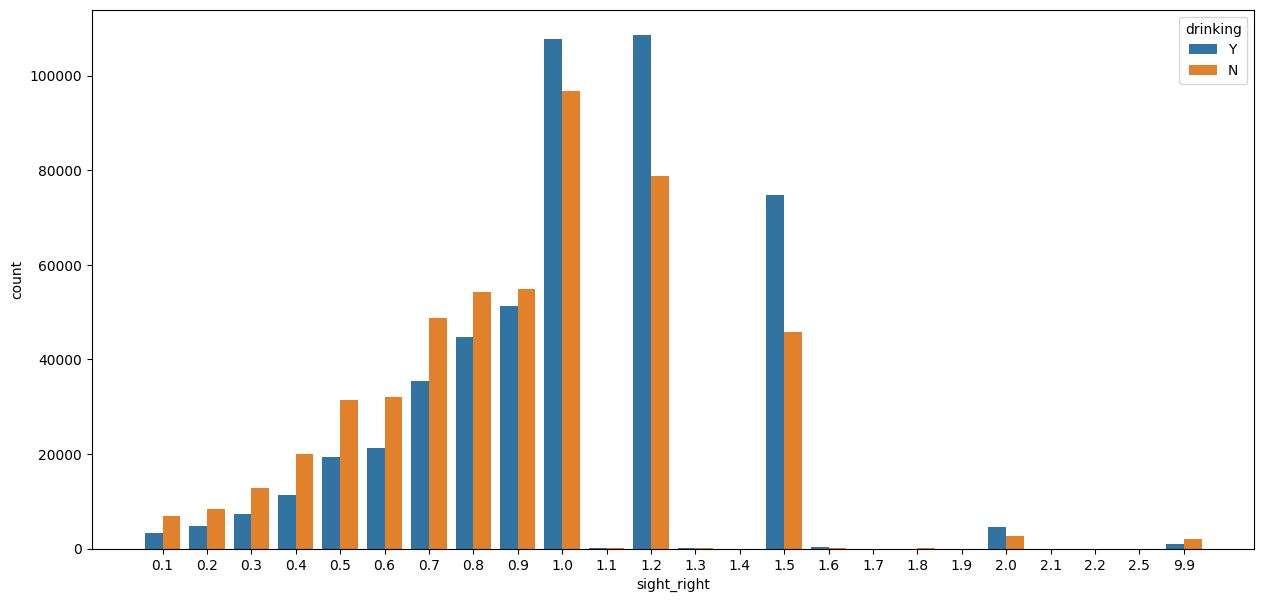

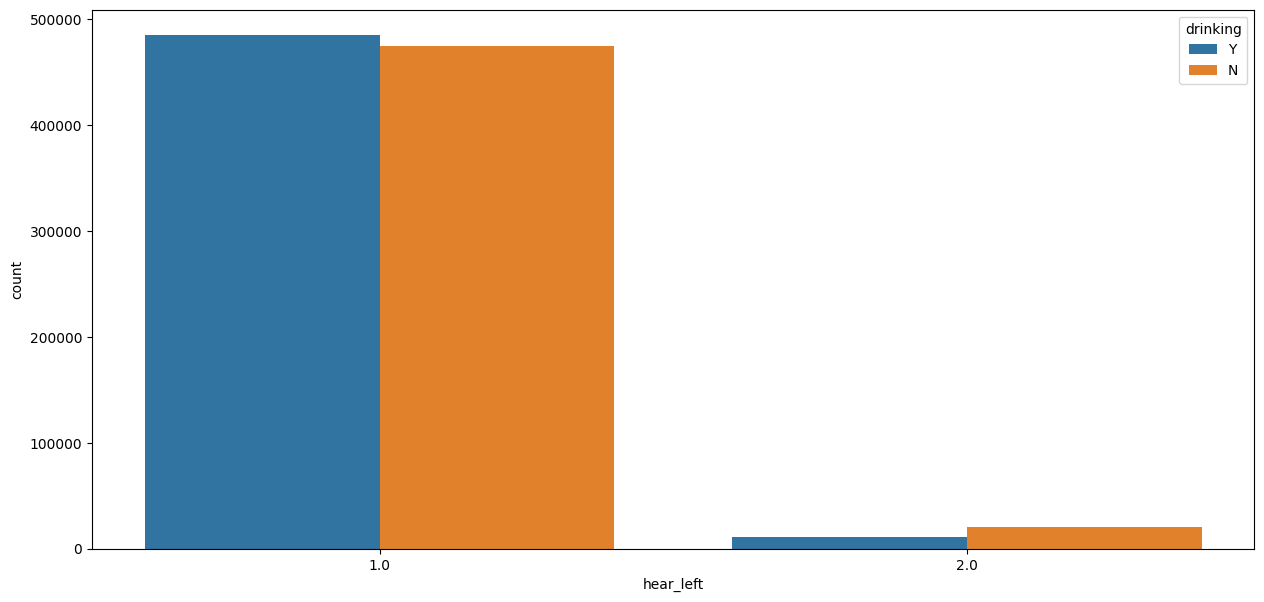

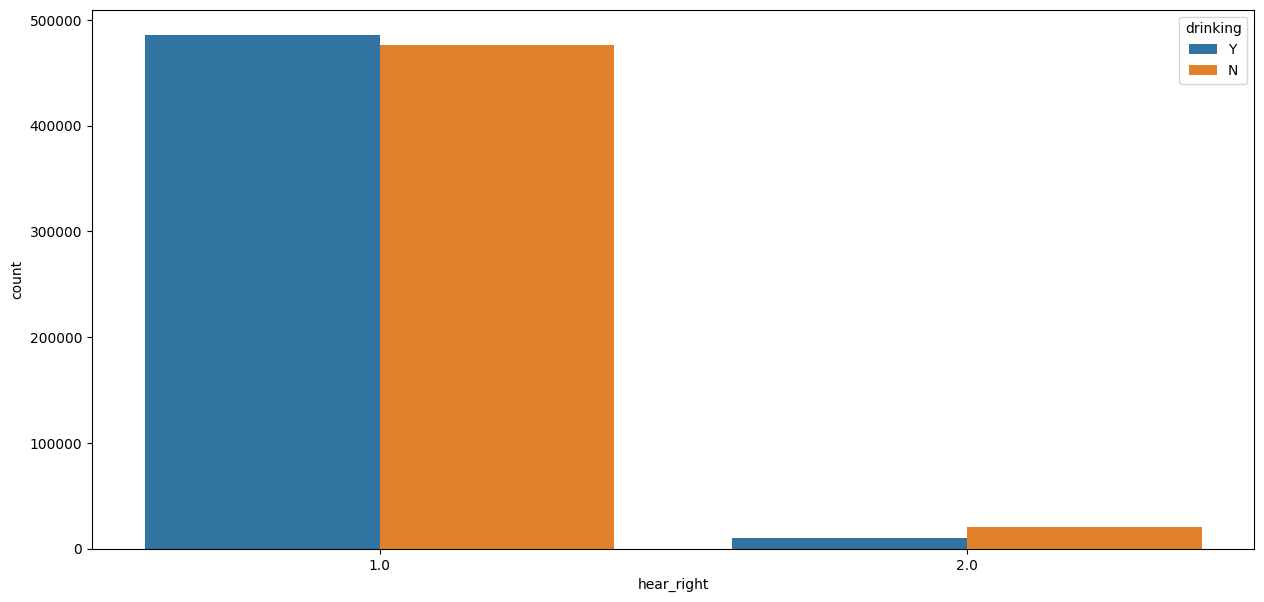

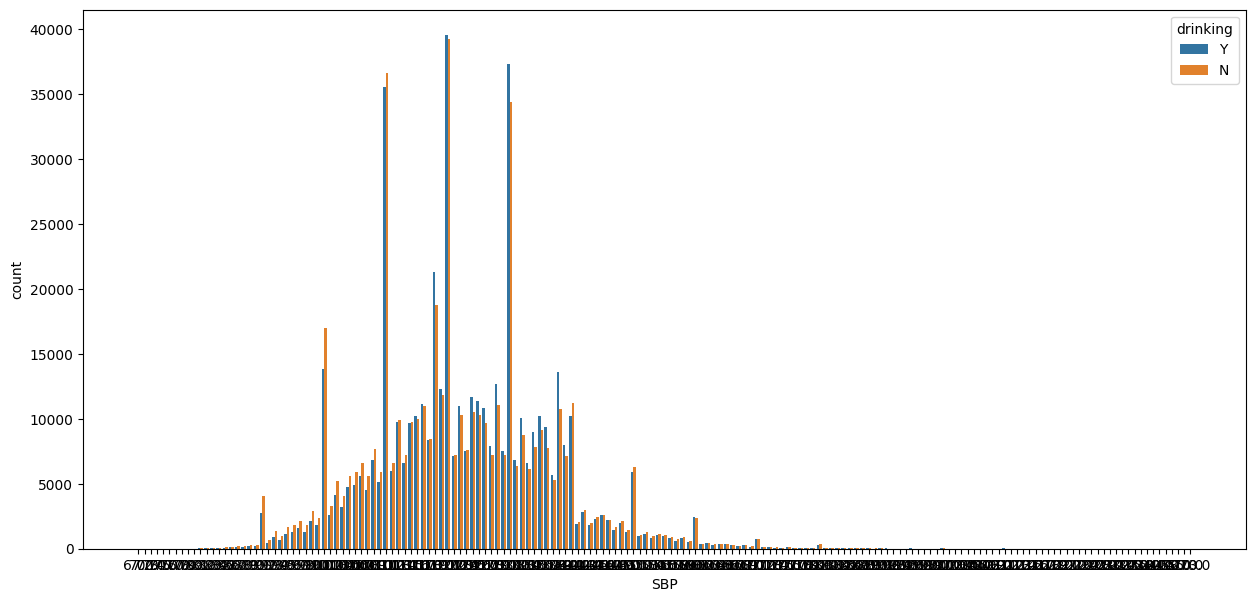

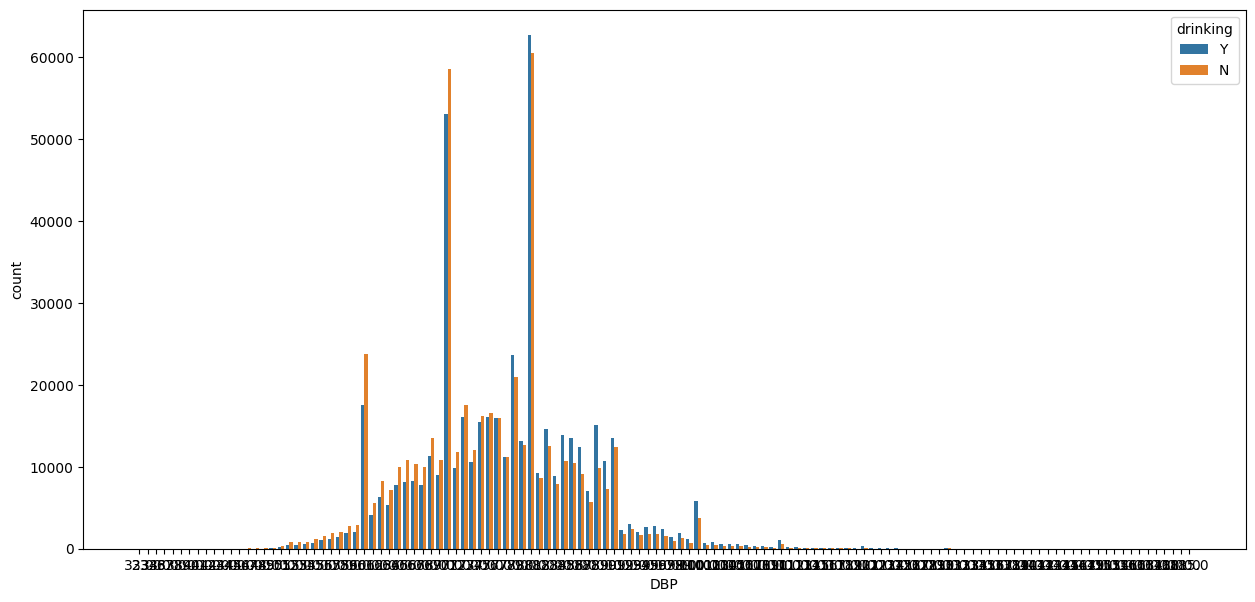

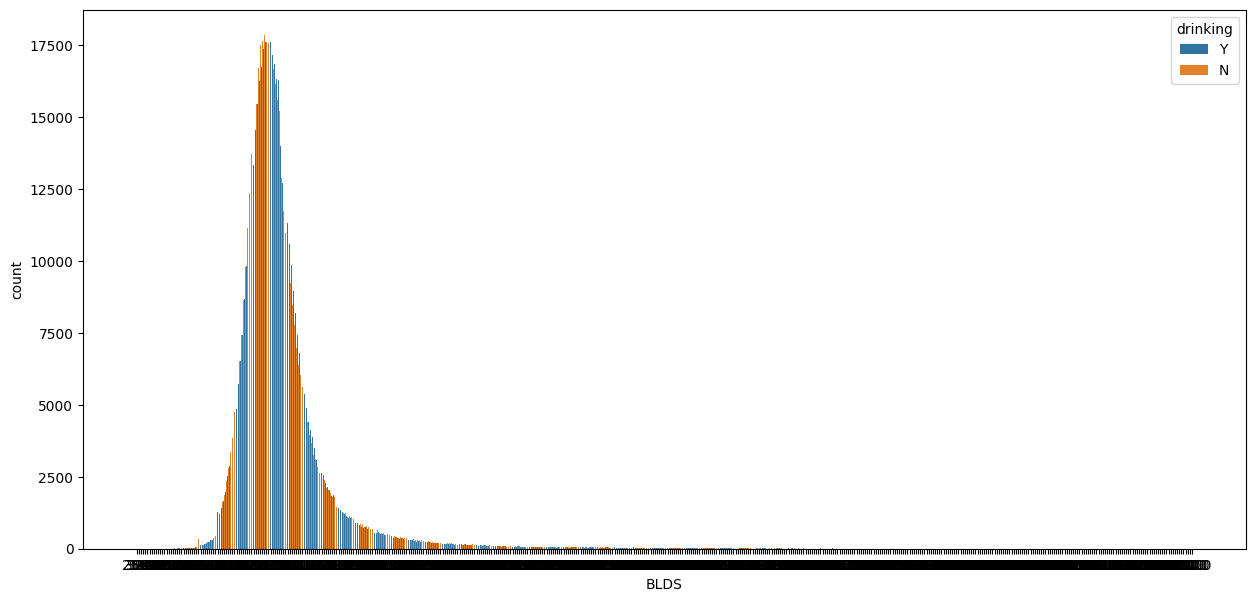

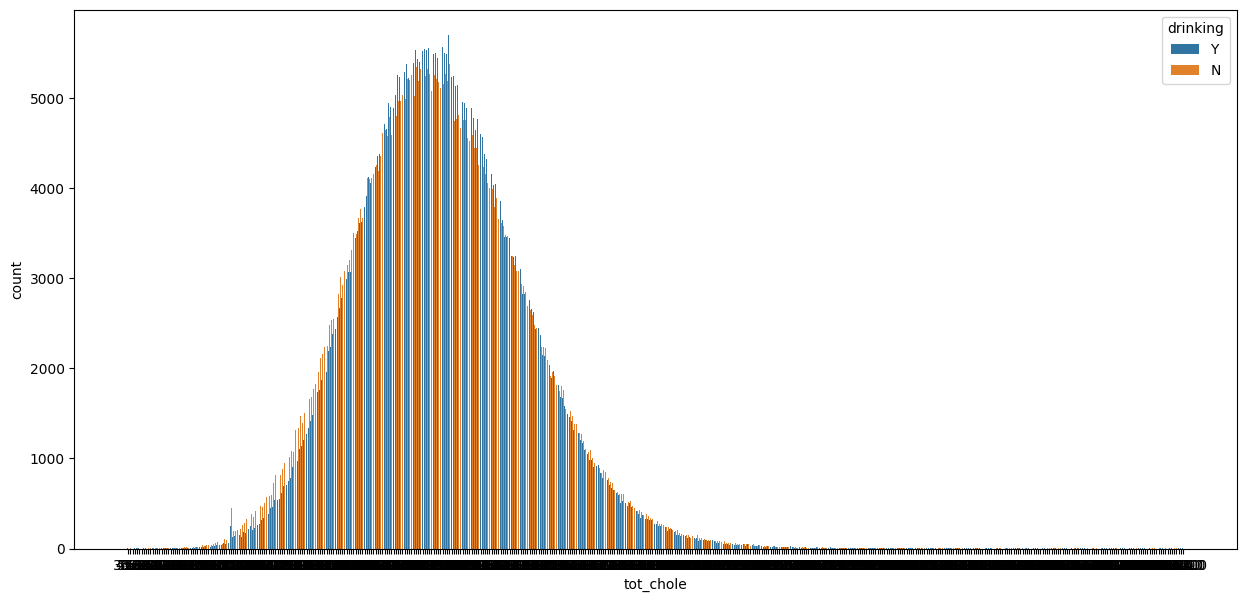

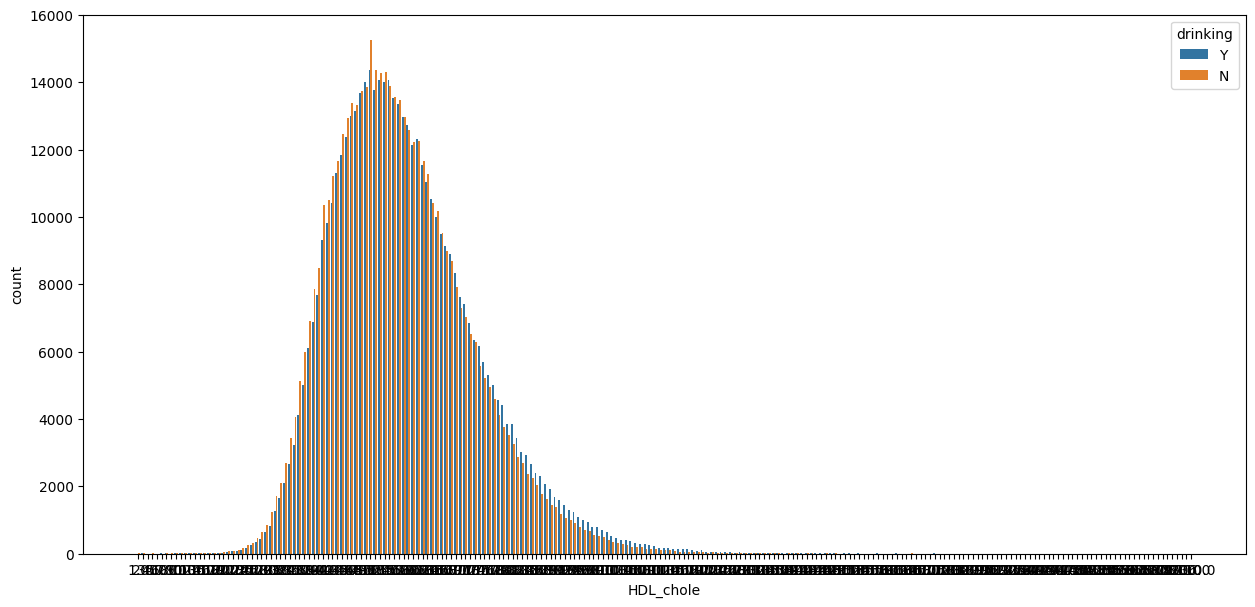

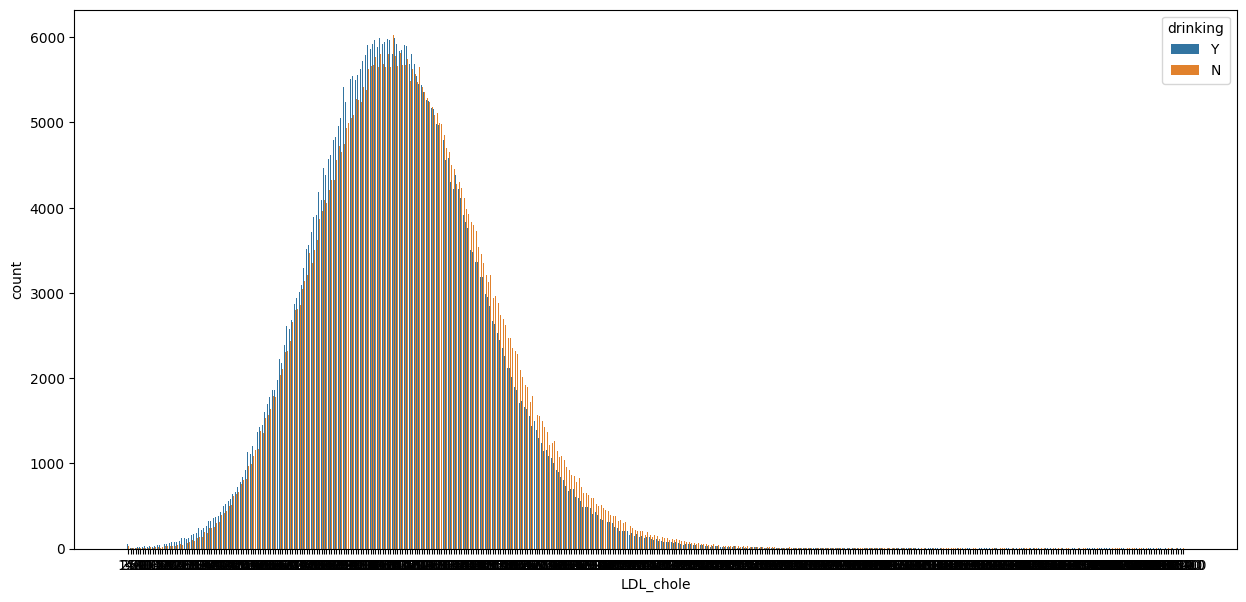

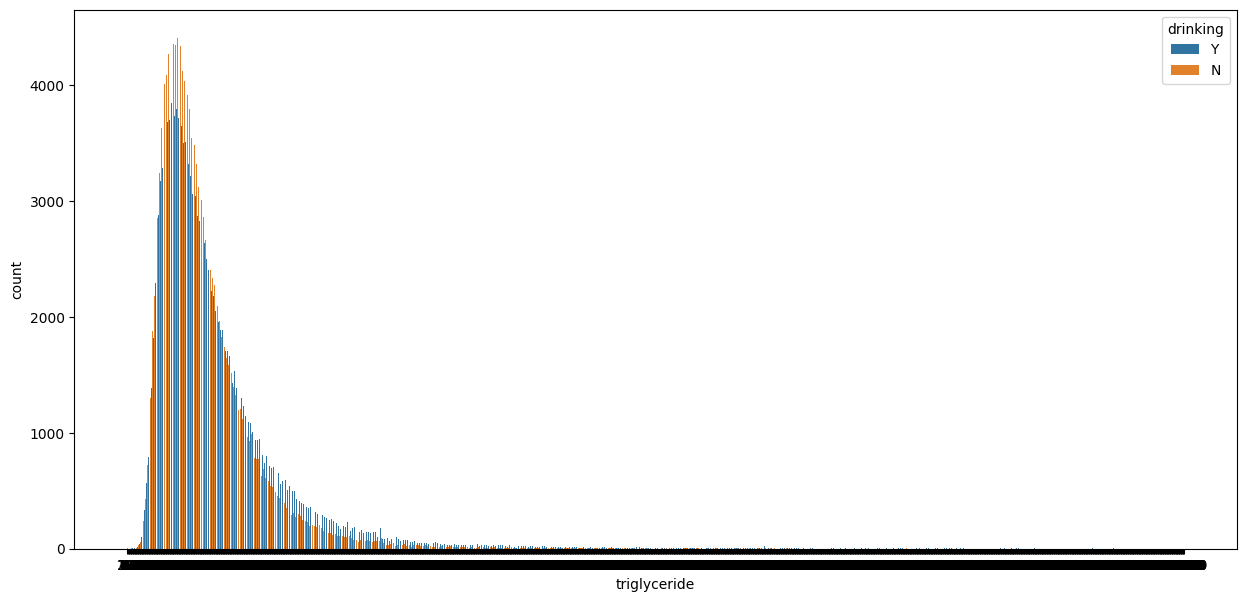

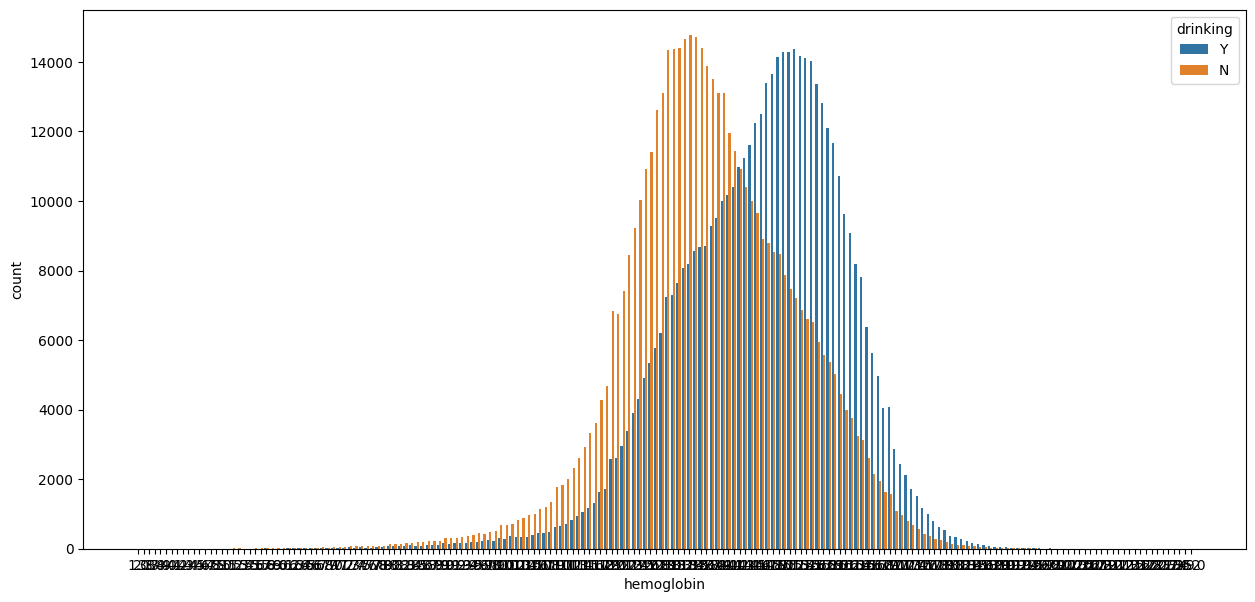

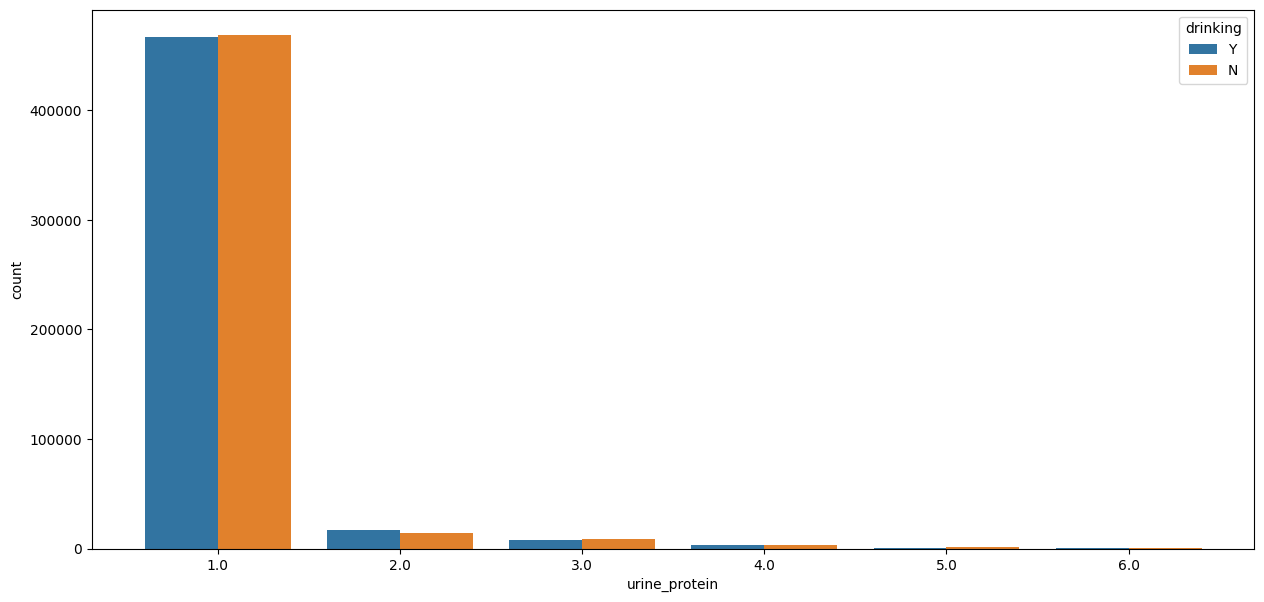

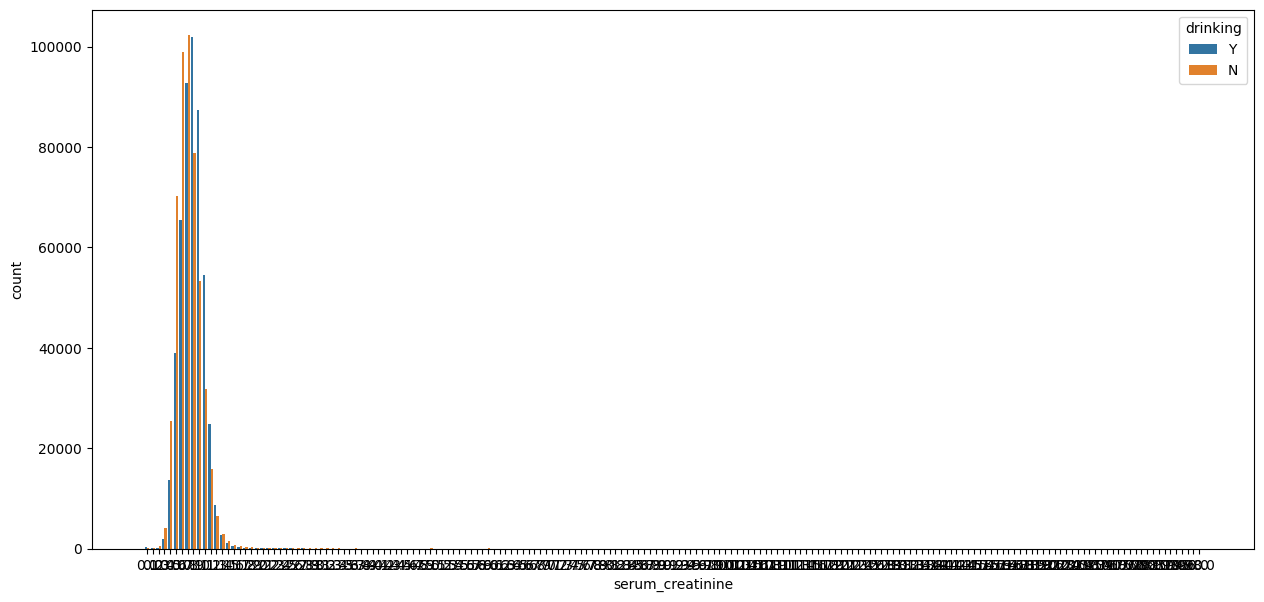

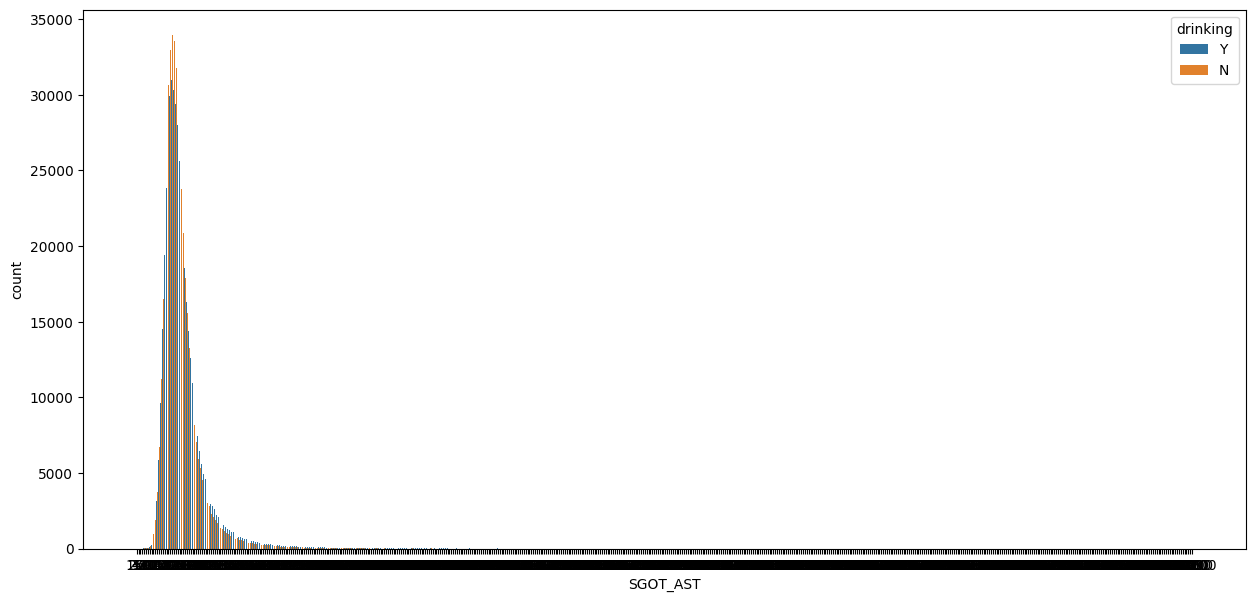

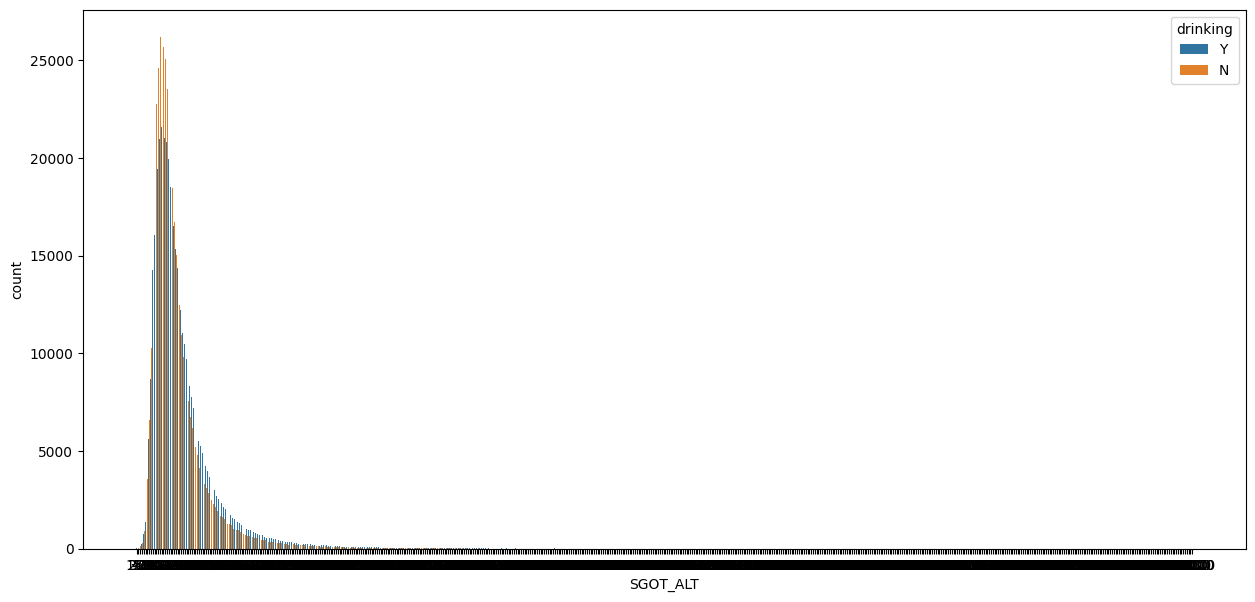

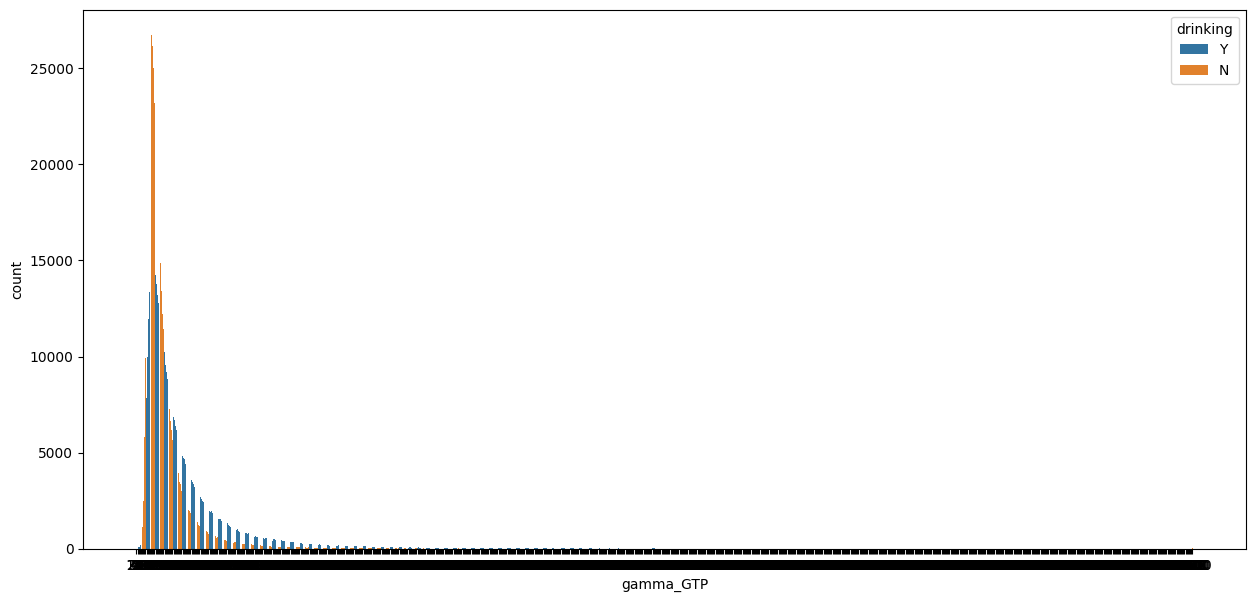

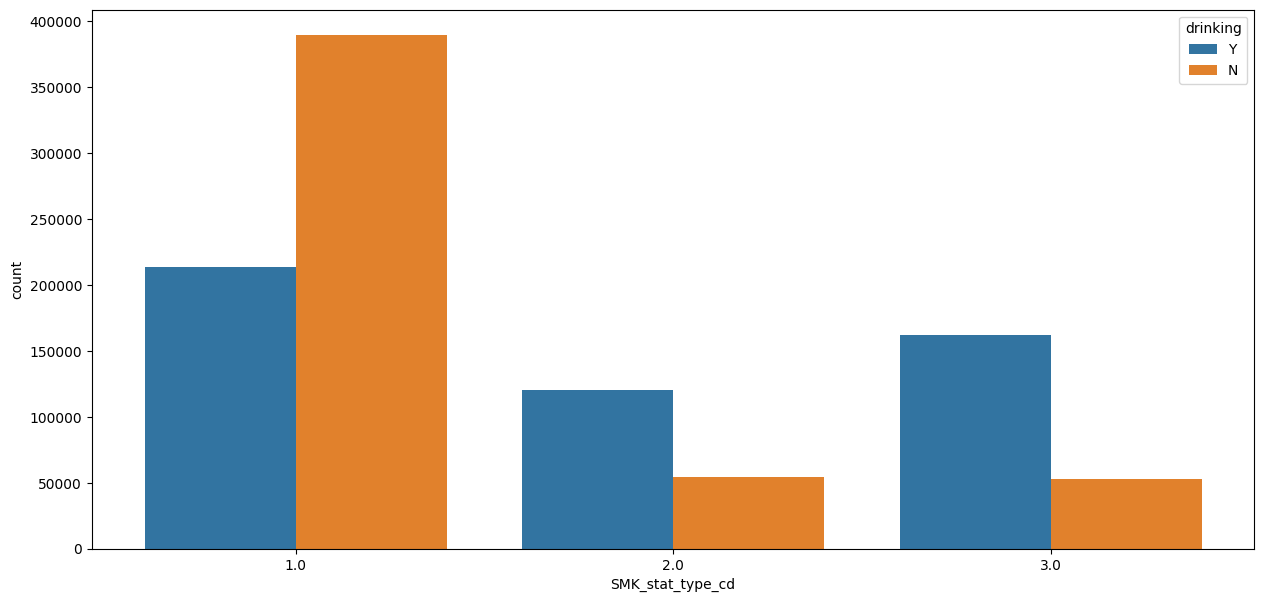

In [ ]:
columns_to_plot = [col for col in df1.columns if col not in ['drinking']]
for i in columns_to_plot:
    plt.figure(figsize=(15,7))
    sns.countplot(data=df1,x=i,hue='drinking')
    plt.show()

In [ ]:
df1['drinking'].replace(['N', 'Y'],[0,1],inplace=True)

**TASK 2**: Exploratory Data Analysis

<ipython-input-51-689886e220f9>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


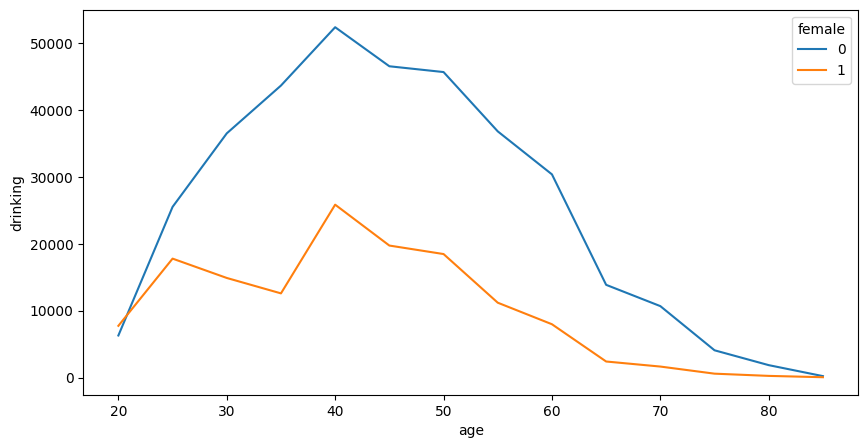

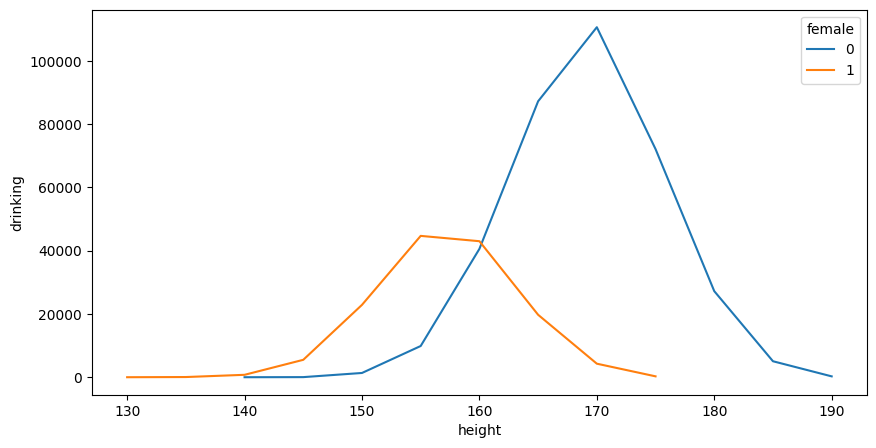

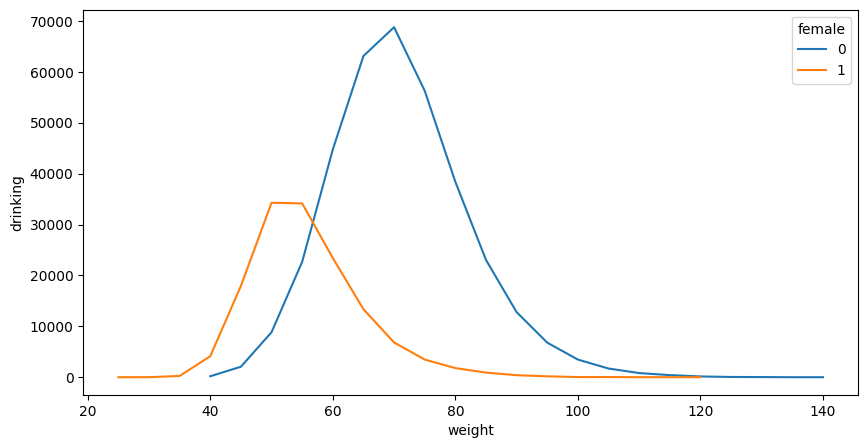

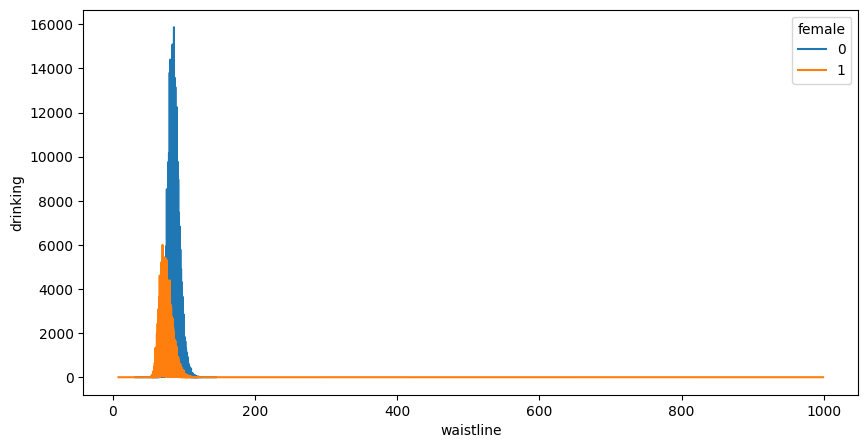

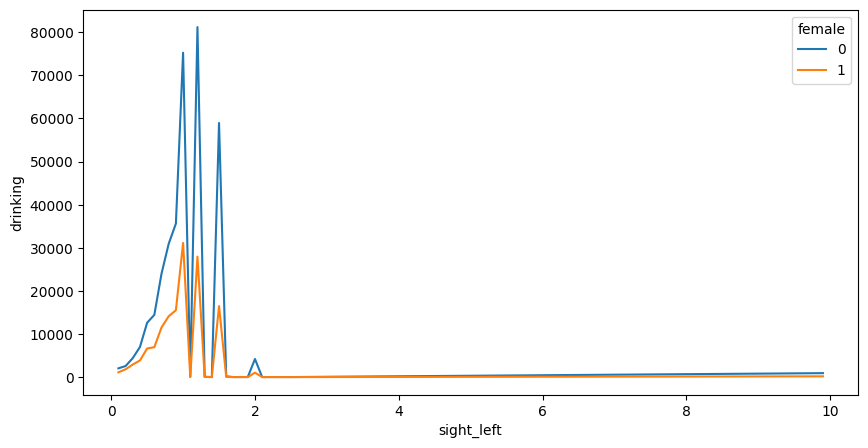

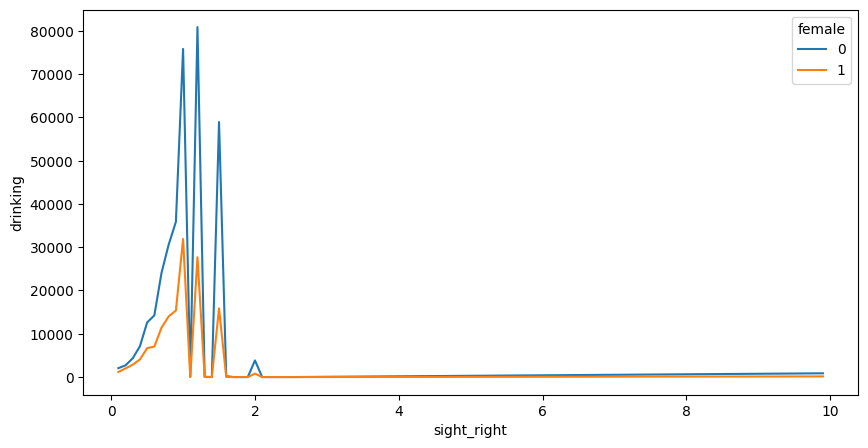

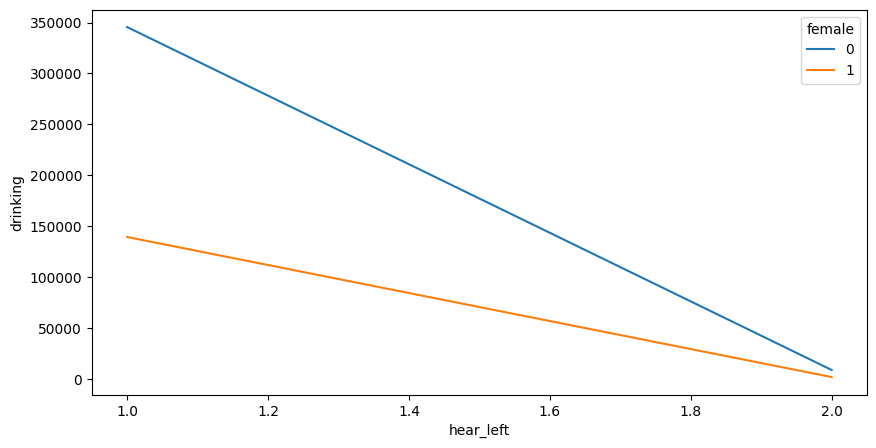

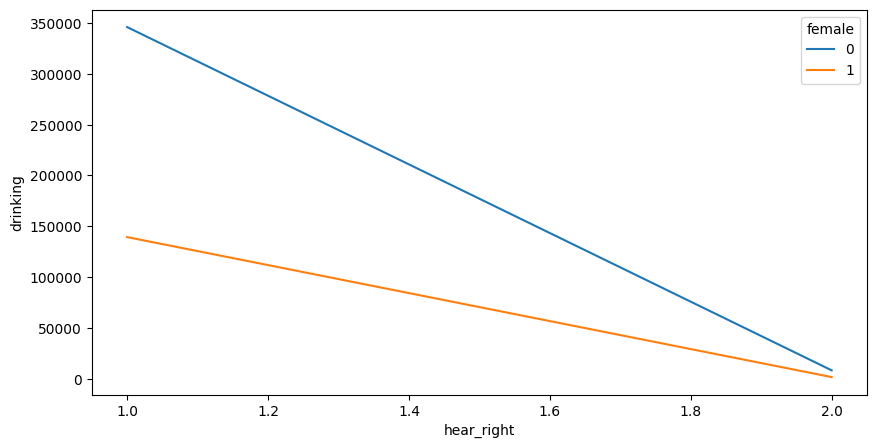

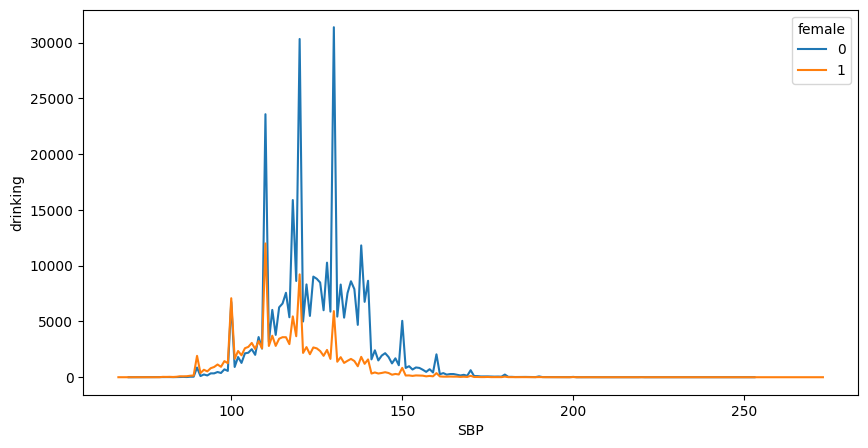

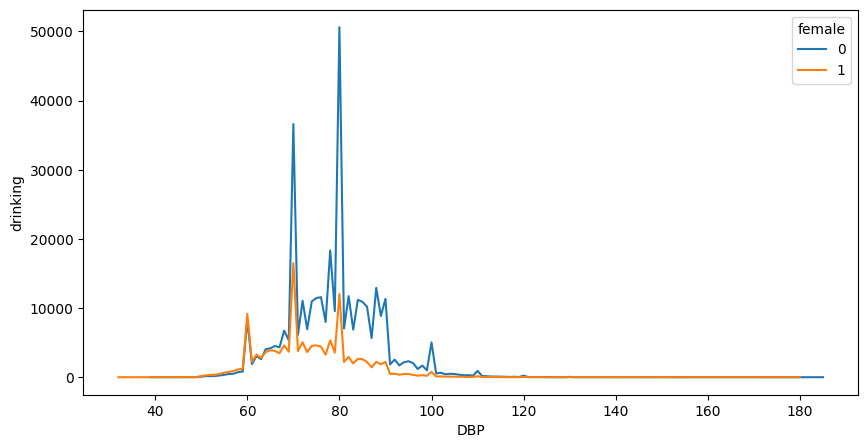

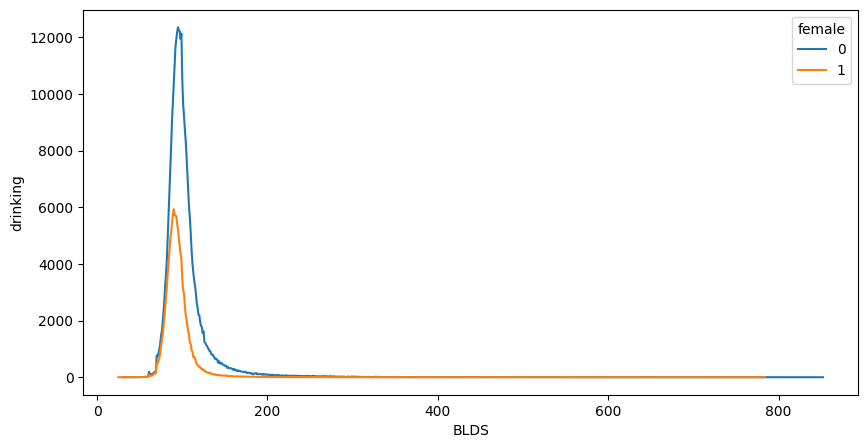

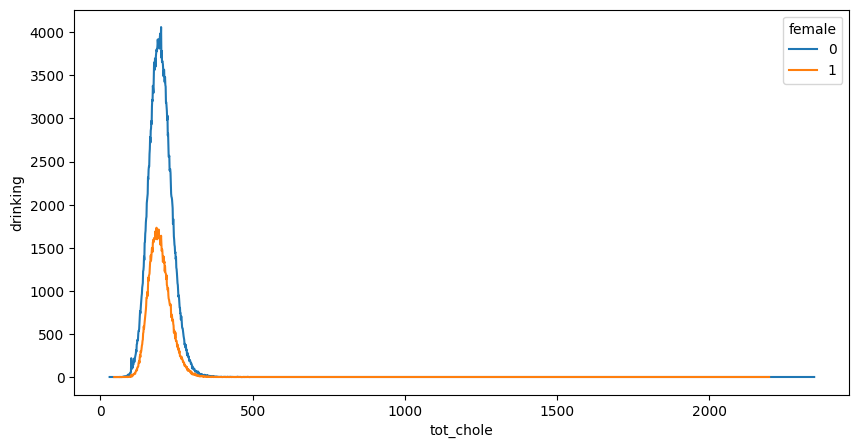

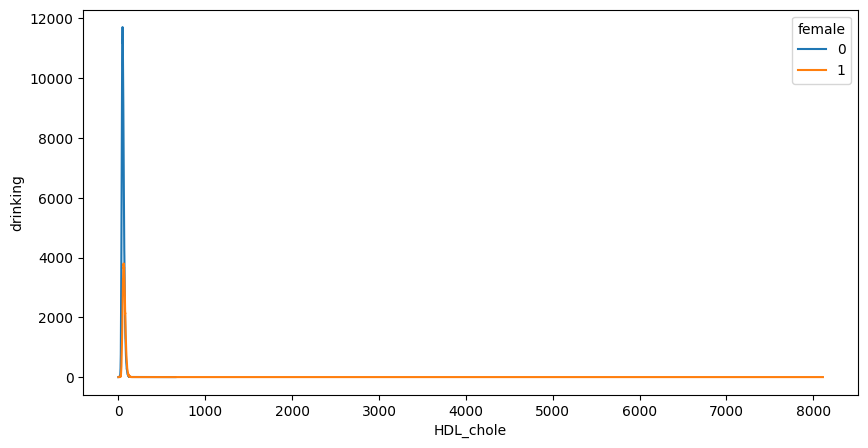

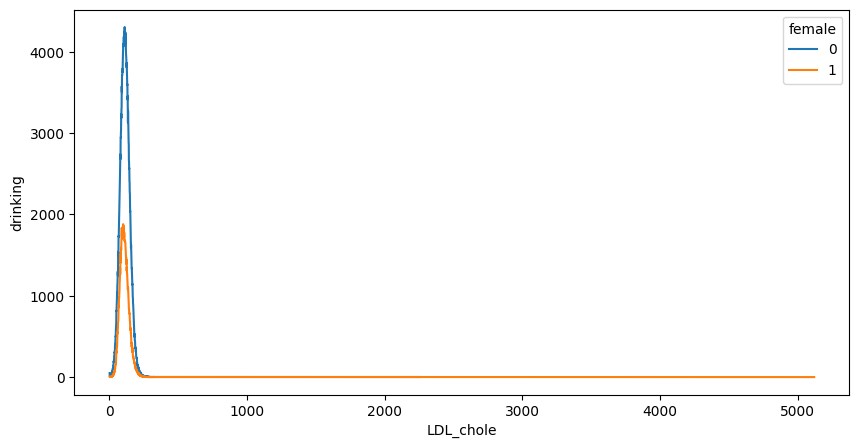

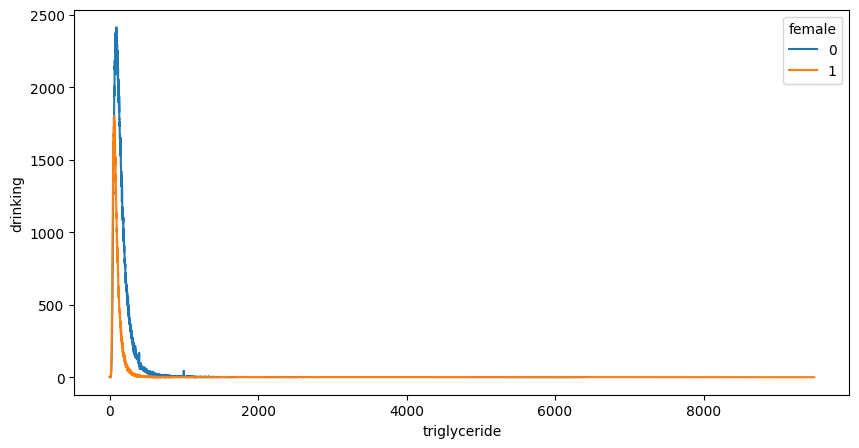

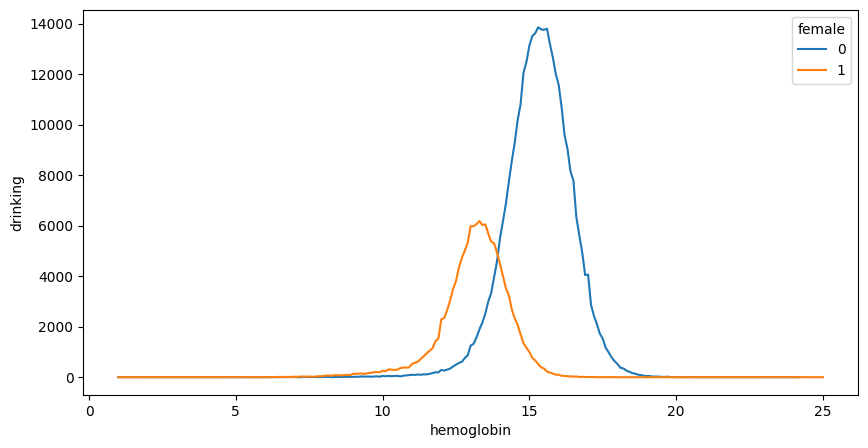

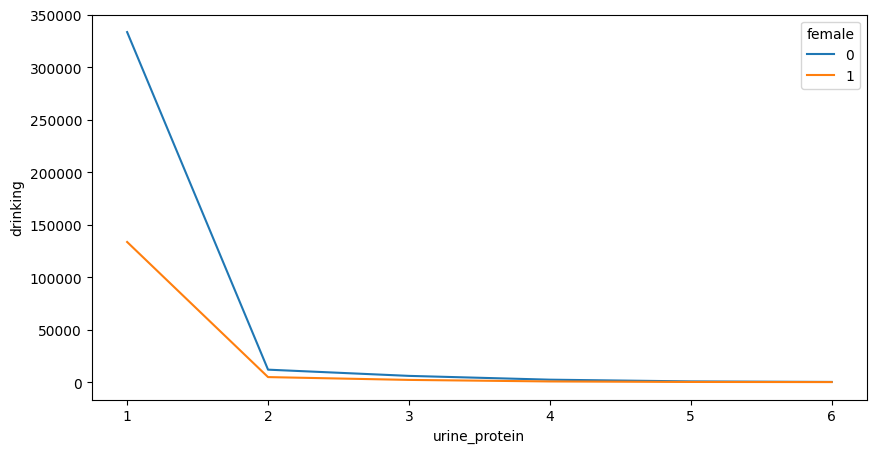

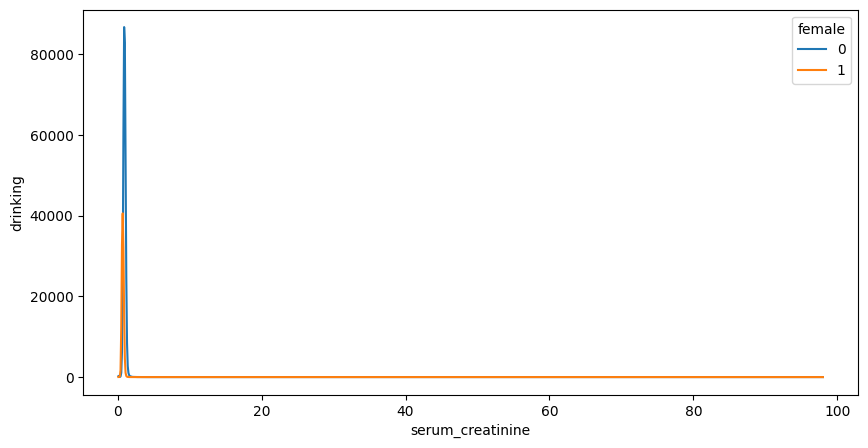

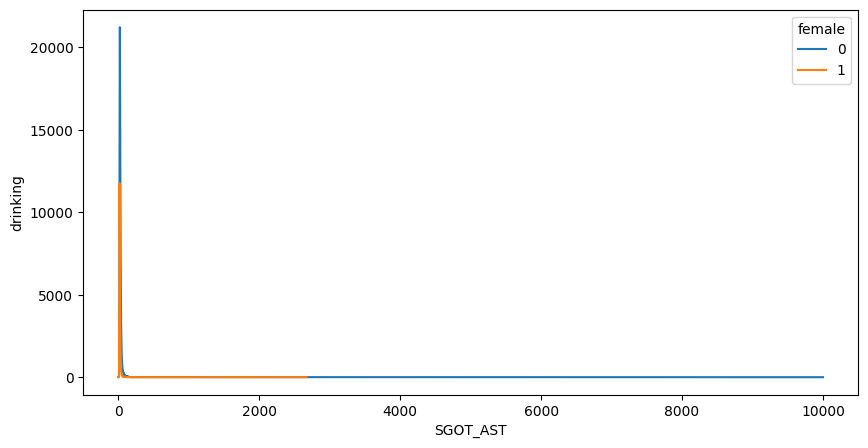

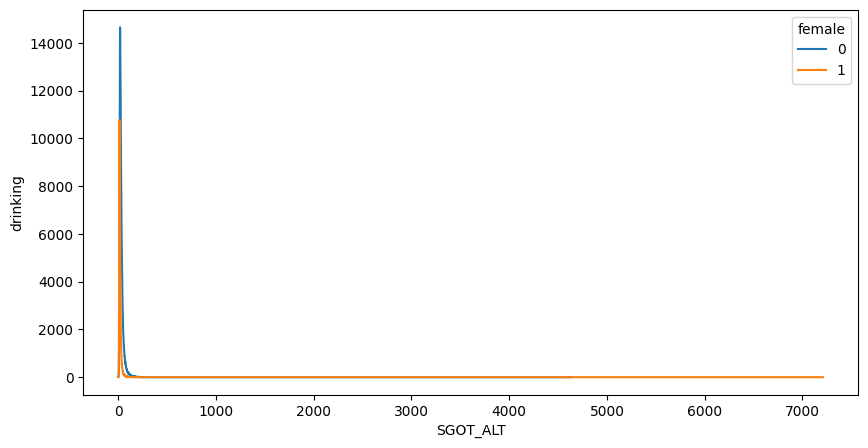

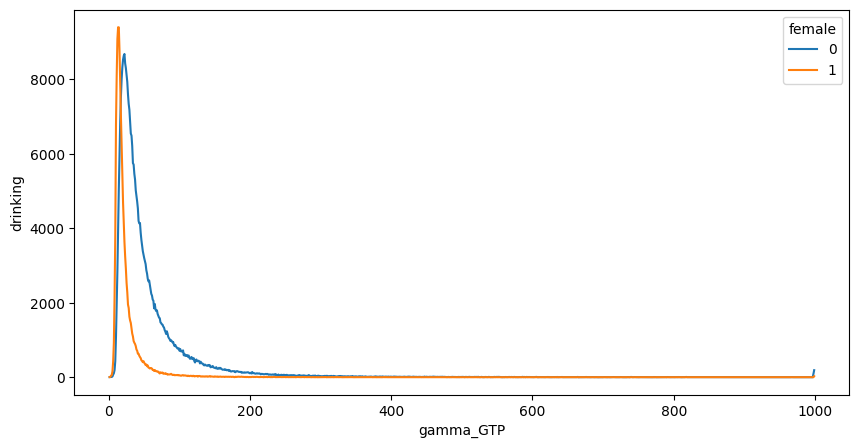

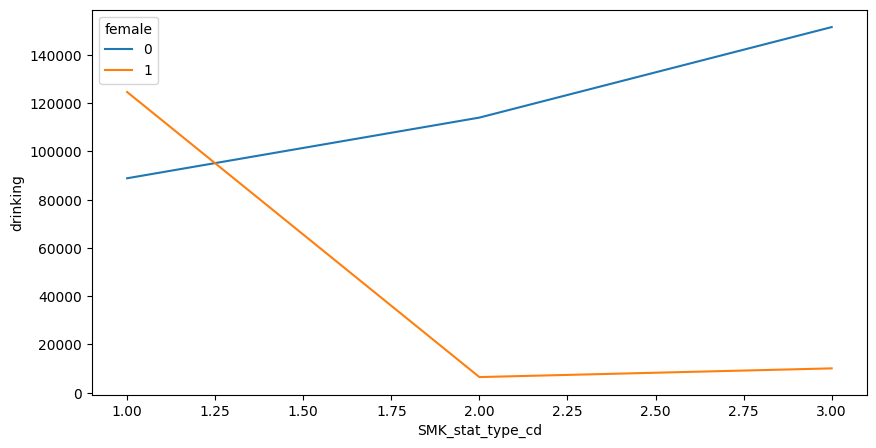

In [ ]:
columns_to_plot = [col for col in df1.columns if col not in ['female','drinking']]
for i in columns_to_plot:
    plt.figure(figsize=(15,7))
    sns.lineplot(data=df1,x=i,y='drinking',hue='female')
    plt.show()

**TASK 4** - Data Preprocessing

In [ ]:
# 4.2 Column Selection
columns_choosen = ['age','BLDS','female','gamma_GTP','HDL_chole','hemoglobin','SBP','SMK_stat_type_cd','tot_chole','triglyceride','weight','drinking']
df1 = df1[columns_choosen]

independent_variables = ['age','BLDS','female','gamma_GTP','HDL_chole','hemoglobin','SBP','SMK_stat_type_cd','tot_chole','triglyceride','weight',]
dependent_variables = ['drinking']

In [ ]:
# 4.3 - Min-Max Scalar
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(df1[independent_variables])
processed_data_4 = min_max_scaler.transform(df1[independent_variables])
processed_data_4 = pd.DataFrame(processed_data_4,columns=independent_variables)
processed_data_4['drinking'] = df1['drinking']

# 4.4 - Standard Scalar
standard_scaler = StandardScaler()
standard_scaler.fit(df1[independent_variables])
processed_data_5 = standard_scaler.transform(df1[independent_variables])
processed_data_5 = pd.DataFrame(processed_data_5,columns=independent_variables)
processed_data_5['drinking'] = df1['drinking']

In [ ]:
# 4.5 - Categorical Mapping
cat_map = {
          'SBP': {
            '70_80': 1,
            '80_90': 2,
            '90_100': 3,
            '100_110': 4,
            '110_120': 5,
            '120_130': 6,
            '130_140': 7,
            '140_150': 8,
            '150_160': 9,
            '160_170': 10,
            '170_180': 11,
            '180_190': 12,
            '190_200': 13,
            '200_210': 14,
            '210_220': 15,
            '220_230': 16,
            '230_240': 17,
            '240_250': 18,
            '250_260': 19,
            '270_280': 20
          },
          'BLDS': {
            '25_75': 1,
            '75_125': 2,
            '125_175': 3,
            '175_225': 4,
            '225_275': 5,
            '275_325': 6,
            '325_375': 7,
            '375_425': 8,
            '425_475': 9,
            '475_525': 10,
            '525_575': 11,
            '575_625': 12,
            '625_675': 13,
            '675_725': 14,
            '725_775': 15,
            '775_825': 16,
            '825_875': 17
          },
          'tot_chole': {
            '30_80': 1,
            '80_130': 2,
            '130_180': 3,
            '180_230': 4,
            '230_280': 5,
            '280_330': 6,
            '330_380': 7,
            '380_430': 8,
            '430_480': 9,
            '480_530': 10,
            '530_580': 11,
            '580_630': 12,
            '630_680': 13,
            '680_730': 14,
            '730_780': 15,
            '780_830': 16,
            '830_880': 17,
            '880_930': 18,
            '1030_1080': 19,
            '1180_1230': 20,
            '1280_1330': 21,
            '1330_1380': 22,
            '1430_1480': 23,
            '1530_1580': 24,
            '1580_1630': 25,
            '1730_1780': 26,
            '1780_1830': 27,
            '2030_2080': 28,
            '2180_2230': 29,
            '2330_2380': 30
          },
          'HDL_chole': {
            '0_50': 1,
            '50_100': 2,
            '100_150': 3,
            '150_200': 4,
            '200_250': 5,
            '300_350': 6,
            '350_400': 7,
            '400_450': 8,
            '450_500': 9,
            '500_550': 10,
            '550_600': 11,
            '600_650': 12,
            '650_700': 13,
            '700_750': 14,
            '750_800': 15,
            '900_950': 16,
            '1200_1250': 17,
            '8100_8150': 18
          },
          'triglyceride': {
            '0_500': 1,
            '500_1000': 2,
            '1000_1500': 3,
            '1500_2000': 4,
            '2000_2500': 5,
            '2500_3000': 6,
            '3000_3500': 7,
            '3500_4000': 8,
            '4000_4500': 9,
            '5000_5500': 10,
            '6000_6500': 11,
            '9000_9500': 12
          },
          'hemoglobin': {
            '0_5': 1,
            '5_10': 2,
            '10_15': 3,
            '15_20': 4,
            '20_25': 5
          },
          'gamma_GTP': {
            '0_10': 1,
            '10_20': 2,
            '20_30': 3,
            '30_40': 4,
            '40_50': 5,
            '50_60': 6,
            '60_70': 7,
            '70_80': 8,
            '80_90': 9,
            '90_100': 10,
            '100_110': 11,
            '110_120': 12,
            '120_130': 13,
            '130_140': 14,
            '140_150': 15,
            '150_160': 16,
            '160_170': 17,
            '170_180': 18,
            '180_190': 19,
            '190_200': 20,
            '200_210': 21,
            '210_220': 22,
            '220_230': 23,
            '230_240': 24,
            '240_250': 25,
            '250_260': 26,
            '260_270': 27,
            '270_280': 28,
            '280_290': 29,
            '290_300': 30,
            '300_310': 31,
            '310_320': 32,
            '320_330': 33,
            '330_340': 34,
            '340_350': 35,
            '350_360': 36,
            '360_370': 37,
            '370_380': 38,
            '380_390': 39,
            '390_400': 40,
            '400_410': 41,
            '410_420': 42,
            '420_430': 43,
            '430_440': 44,
            '440_450': 45,
            '450_460': 46,
            '460_470': 47,
            '470_480': 48,
            '480_490': 49,
            '490_500': 50,
            '500_510': 51,
            '510_520': 52,
            '520_530': 53,
            '530_540': 54,
            '540_550': 55,
            '550_560': 56,
            '560_570': 57,
            '570_580': 58,
            '580_590': 59,
            '590_600': 60,
            '600_610': 61,
            '610_620': 62,
            '620_630': 63,
            '630_640': 64,
            '640_650': 65,
            '650_660': 66,
            '660_670': 67,
            '670_680': 68,
            '680_690': 69,
            '690_700': 70,
            '700_710': 71,
            '710_720': 72,
            '720_730': 73,
            '730_740': 74,
            '740_750': 75,
            '750_760': 76,
            '760_770': 77,
            '770_780': 78,
            '780_790': 79,
            '790_800': 80,
            '800_810': 81,
            '810_820': 82,
            '820_830': 83,
            '830_840': 84,
            '840_850': 85,
            '850_860': 86,
            '860_870': 87,
            '870_880': 88,
            '880_890': 89,
            '890_900': 90,
            '900_910': 91,
            '910_920': 92,
            '920_930': 93,
            '930_940': 94,
            '940_950': 95,
            '950_960': 96,
            '960_970': 97,
            '970_980': 98,
            '980_990': 99,
            '990_1000': 100
          }
        }

def SBP_map(i):
    if i < 80:
        return "70_80"
    elif i < 90:
        return "80_90"
    elif i < 100:
        return "90_100"
    elif i < 110:
        return "100_110"
    elif i < 120:
        return "110_120"
    elif i < 130:
        return "120_130"
    elif i < 140:
        return "130_140"
    elif i < 150:
        return "140_150"
    elif i < 160:
        return "150_160"
    elif i < 170:
        return "160_170"
    elif i < 180:
        return "170_180"
    elif i < 190:
        return "180_190"
    elif i < 200:
        return "190_200"
    elif i < 210:
        return "200_210"
    elif i < 220:
        return "210_220"
    elif i < 230:
        return "220_230"
    elif i < 240:
        return "230_240"
    elif i < 250:
        return "240_250"
    elif i < 260:
        return "250_260"
    elif i < 280:
        return "270_280"
    else:
        return ">280"

def BLDS_map(i):
    if i < 75:
        return "25_75"
    elif i < 125:
        return "75_125"
    elif i < 175:
        return "125_175"
    elif i < 225:
        return "175_225"
    elif i < 275:
        return "225_275"
    elif i < 325:
        return "275_325"
    elif i < 375:
        return "325_375"
    elif i < 425:
        return "375_425"
    elif i < 475:
        return "425_475"
    elif i < 525:
        return "475_525"
    elif i < 575:
        return "525_575"
    elif i < 625:
        return "575_625"
    elif i < 675:
        return "625_675"
    elif i < 725:
        return "675_725"
    elif i < 775:
        return "725_775"
    elif i < 825:
        return "775_825"
    elif i < 875:
        return "825_875"
    else:
        return ">875"

def tot_chole_map(i):
    if i < 80:
        return "30_80"
    elif i < 130:
        return "80_130"
    elif i < 180:
        return "130_180"
    elif i < 230:
        return "180_230"
    elif i < 280:
        return "230_280"
    elif i < 330:
        return "280_330"
    elif i < 380:
        return "330_380"
    elif i < 430:
        return "380_430"
    elif i < 480:
        return "430_480"
    elif i < 530:
        return "480_530"
    elif i < 580:
        return "530_580"
    elif i < 630:
        return "580_630"
    elif i < 680:
        return "630_680"
    elif i < 730:
        return "680_730"
    elif i < 780:
        return "730_780"
    elif i < 830:
        return "780_830"
    elif i < 880:
        return "830_880"
    elif i < 930:
        return "880_930"
    elif i < 1080:
        return "1030_1080"
    elif i < 1230:
        return "1180_1230"
    elif i < 1330:
        return "1280_1330"
    elif i < 1380:
        return "1330_1380"
    elif i < 1480:
        return "1430_1480"
    elif i < 1580:
        return "1530_1580"
    elif i < 1630:
        return "1580_1630"
    elif i < 1780:
        return "1730_1780"
    elif i < 1830:
        return "1780_1830"
    elif i < 2080:
        return "2030_2080"
    elif i < 2230:
        return "2180_2230"
    elif i < 2380:
        return "2330_2380"
    else:
        return ">2380"

def HDL_chole_map(i):
    if i < 50:
        return "0_50"
    elif i < 100:
        return "50_100"
    elif i < 150:
        return "100_150"
    elif i < 200:
        return "150_200"
    elif i < 250:
        return "200_250"
    elif i < 350:
        return "300_350"
    elif i < 400:
        return "350_400"
    elif i < 450:
        return "400_450"
    elif i < 500:
        return "450_500"
    elif i < 550:
        return "500_550"
    elif i < 600:
        return "550_600"
    elif i < 650:
        return "600_650"
    elif i < 700:
        return "650_700"
    elif i < 750:
        return "700_750"
    elif i < 800:
        return "750_800"
    elif i < 950:
        return "900_950"
    elif i < 1250:
        return "1200_1250"
    elif i < 8150:
        return "8100_8150"
    else:
        return ">8150"

def triglyceride_map(i):
    if i < 500:
        return "0_500"
    elif i < 1000:
        return "500_1000"
    elif i < 1500:
        return "1000_1500"
    elif i < 2000:
        return "1500_2000"
    elif i < 2500:
        return "2000_2500"
    elif i < 3000:
        return "2500_3000"
    elif i < 3500:
        return "3000_3500"
    elif i < 4000:
        return "3500_4000"
    elif i < 4500:
        return "4000_4500"
    elif i < 5500:
        return "5000_5500"
    elif i < 6500:
        return "6000_6500"
    elif i < 9500:
        return "9000_9500"
    else:
        return ">9500"

def hemoglobin_map(i):
    if i < 5:
        return "0_5"
    elif i < 10:
        return "5_10"
    elif i < 15:
        return "10_15"
    elif i < 20:
        return "15_20"
    elif i < 25:
        return "20_25"
    else:
        return ">25"

def gamma_GTP_map(i):
    if i < 10:
        return "0_10"
    elif i < 20:
        return "10_20"
    elif i < 30:
        return "20_30"
    elif i < 40:
        return "30_40"
    elif i < 50:
        return "40_50"
    elif i < 60:
        return "50_60"
    elif i < 70:
        return "60_70"
    elif i < 80:
        return "70_80"
    elif i < 90:
        return "80_90"
    elif i < 100:
        return "90_100"
    elif i < 110:
        return "100_110"
    elif i < 120:
        return "110_120"
    elif i < 130:
        return "120_130"
    elif i < 140:
        return "130_140"
    elif i < 150:
        return "140_150"
    elif i < 160:
        return "150_160"
    elif i < 170:
        return "160_170"
    elif i < 180:
        return "170_180"
    elif i < 190:
        return "180_190"
    elif i < 200:
        return "190_200"
    elif i < 210:
        return "200_210"
    elif i < 220:
        return "210_220"
    elif i < 230:
        return "220_230"
    elif i < 240:
        return "230_240"
    elif i < 250:
        return "240_250"
    elif i < 260:
        return "250_260"
    elif i < 270:
        return "260_270"
    elif i < 280:
        return "270_280"
    elif i < 290:
        return "280_290"
    elif i < 300:
        return "290_300"
    elif i < 310:
        return "300_310"
    elif i < 320:
        return "310_320"
    elif i < 330:
        return "320_330"
    elif i < 340:
        return "330_340"
    elif i < 350:
        return "340_350"
    elif i < 360:
        return "350_360"
    elif i < 370:
        return "360_370"
    elif i < 380:
        return "370_380"
    elif i < 390:
        return "380_390"
    elif i < 400:
        return "390_400"
    elif i < 410:
        return "400_410"
    elif i < 420:
        return "410_420"
    elif i < 430:
        return "420_430"
    elif i < 440:
        return "430_440"
    elif i < 450:
        return "440_450"
    elif i < 460:
        return "450_460"
    elif i < 470:
        return "460_470"
    elif i < 480:
        return "470_480"
    elif i < 490:
        return "480_490"
    elif i < 500:
        return "490_500"
    elif i < 510:
        return "500_510"
    elif i < 520:
        return "510_520"
    elif i < 530:
        return "520_530"
    elif i < 540:
        return "530_540"
    elif i < 550:
        return "540_550"
    elif i < 560:
        return "550_560"
    elif i < 570:
        return "560_570"
    elif i < 580:
        return "570_580"
    elif i < 590:
        return "580_590"
    elif i < 600:
        return "590_600"
    elif i < 610:
        return "600_610"
    elif i < 620:
        return "610_620"
    elif i < 630:
        return "620_630"
    elif i < 640:
        return "630_640"
    elif i < 650:
        return "640_650"
    elif i < 660:
        return "650_660"
    elif i < 670:
        return "660_670"
    elif i < 680:
        return "670_680"
    elif i < 690:
        return "680_690"
    elif i < 700:
        return "690_700"
    elif i < 710:
        return "700_710"
    elif i < 720:
        return "710_720"
    elif i < 730:
        return "720_730"
    elif i < 740:
        return "730_740"
    elif i < 750:
        return "740_750"
    elif i < 760:
        return "750_760"
    elif i < 770:
        return "760_770"
    elif i < 780:
        return "770_780"
    elif i < 790:
        return "780_790"
    elif i < 800:
        return "790_800"
    elif i < 810:
        return "800_810"
    elif i < 820:
        return "810_820"
    elif i < 830:
        return "820_830"
    elif i < 840:
        return "830_840"
    elif i < 850:
        return "840_850"
    elif i < 860:
        return "850_860"
    elif i < 870:
        return "860_870"
    elif i < 880:
        return "870_880"
    elif i < 890:
        return "880_890"
    elif i < 900:
        return "890_900"
    elif i < 910:
        return "900_910"
    elif i < 920:
        return "910_920"
    elif i < 930:
        return "920_930"
    elif i < 940:
        return "930_940"
    elif i < 950:
        return "940_950"
    elif i < 960:
        return "950_960"
    elif i < 970:
        return "960_970"
    elif i < 980:
        return "970_980"
    elif i < 990:
        return "980_990"
    elif i < 1000:
        return "990_1000"
    else:
        return ">1000"

df1['SBP'] = df1['SBP'].map(SBP_map)
df1['BLDS'] = df1['BLDS'].map(BLDS_map)
df1['tot_chole'] = df1['tot_chole'].map(tot_chole_map)
df1['HDL_chole'] = df1['HDL_chole'].map(HDL_chole_map)
df1['triglyceride'] = df1['triglyceride'].map(triglyceride_map)
df1['hemoglobin'] = df1['hemoglobin'].map(hemoglobin_map)
df1['gamma_GTP'] = df1['gamma_GTP'].map(gamma_GTP_map)

In [ ]:
# 4.6 - Min-Max Scaler with Categorical Mapping
min_max_scaler.fit(df1[independent_variables])
processed_data_2 = min_max_scaler.transform(df1[independent_variables])
processed_data_2 = pd.DataFrame(processed_data_2,columns=independent_variables)
processed_data_2['drinking'] = df1['drinking']

# 4.7 - Standard Scaler with Categorical Mapping
standard_scaler.fit(df1[independent_variables])
processed_data_3 = standard_scaler.transform(df1[independent_variables])
processed_data_3 = pd.DataFrame(processed_data_3,columns=independent_variables)
processed_data_3['drinking'] = df1['drinking']

**TASK 5**: Model Selection, Training, and Optimization

In [ ]:
def training_classifier(x_train,y_train,x_test,y_test,val_train,val_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(random_state=123),

        "Decision Tree": DecisionTreeClassifier(random_state=123),
        "Random Forest": RandomForestClassifier(random_state=123),
        "Extra Trees": ExtraTreesClassifier(random_state=123),

        "SVM": svm.SVC(random_state=123,probability=True),

        "Gaussian Naive Bayes": GaussianNB(),
        "MultiNomial Naive Bayes": MultinomialNB(),

        "K-Nearest Neighbors": KNeighborsClassifier(),

        "AdaBoost": AdaBoostClassifier(random_state=123),
        "Gradient Boosting": GradientBoostingClassifier(random_state=123),
        "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=123),
        "Bagging": BaggingClassifier(random_state=123),

        "Neural Network": MLPClassifier(random_state=123),
    }

    results = []
    for name, clf in classifiers.items():
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        y_proba = clf.predict_proba(x_test)[:, 1]
        result = {
            "Model_Name" : name,
            "Accuracy" : accuracy_score(y_test,y_pred),
            "Precision" : precision_score(y_test,y_pred),
            "Recall" : recall_score(y_test,y_pred),
            "F-1" : f1_score(y_test,y_pred),
            "ROC AUC" : roc_auc_score(y_test,y_proba),
            "Confusion Matrix" : confusion_matrix(y_test,y_pred),
            "Matthews Corr Coef" : matthews_corrcoef(y_test,y_pred),
        }
        results.append(result)

    result_df = pd.DataFrame(data=results)
    return result_df

def _get_data(df_,independent,dependent):
    x_train,x_test,y_train,y_test = train_test_split(df_[independent],df_[dependent],test_size=0.1,random_state=123,shuffle=True,stratify=df_[dependent])
    df_ = training_classifier(x_train,y_train,x_test,y_test,val_train,val_test)
    return df_

In [ ]:
# raw data
report_df1 = _get_data(df_=df1,independent=independent_variables,dependent=dependent_variables)

# MinMaxScaler on Processed Data
report_processed_data_2 = _get_data(df_=processed_data_2,independent=independent_variables,dependent=dependent_variables)

# StandardScaler on Processed Data
report_processed_data_3 = _get_data(df_=processed_data_3,independent=independent_variables,dependent=dependent_variables)

# MinMaxScaler on Raw Data
report_processed_data_4 = _get_data(df_=processed_data_4,independent=independent_variables,dependent=dependent_variables)

# StandardScaler on Raw Data
report_processed_data_5 = _get_data(df_=processed_data_5,independent=independent_variables,dependent=dependent_variables)

In [ ]:
def _custom_random_grid_search(x_train,y_train,n_iter,cv):
    classifiers = {
        "Logistic Regression": LogisticRegression(random_state=123),

        "Decision Tree": DecisionTreeClassifier(random_state=123),
        "Random Forest": RandomForestClassifier(random_state=123),
        "Extra Trees": ExtraTreesClassifier(random_state=123),

        "SVM": svm.SVC(random_state=123,probability=True),

        "MultiNomial Naive Bayes": MultinomialNB(),

        "K-Nearest Neighbors": KNeighborsClassifier(),

        "AdaBoost": AdaBoostClassifier(random_state=123),
        "Gradient Boosting": GradientBoostingClassifier(random_state=123),
        "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=123),
        "Bagging": BaggingClassifier(random_state=123),

        "Neural Network": MLPClassifier(random_state=123),
    }

    models_and_params = [
        (
            "Logistic Regression",
            {
            'C': [1.e-03, 1.e-02, 1.e-01, 1],
            'penalty': ['l1', 'l2','elasticnet'],
            'max_iter': [100, 200, 300],
            }
        ),
        (
            "Decision Tree",
            {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            }
        ),
        (
            "Random Forest",
            {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'n_estimators': [100, 200, 300,500],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            }
        ),
        (
            "Extra Trees",
            {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'n_estimators': [100, 200, 300,500],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            }
        ),
        (
            "SVM",
            {
            'C': [1.e-03, 1.e-02, 1.e-01, 1],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'degree': [2, 3, 4],
            }
        ),
        (
            "Multinomial Naive Bayes",
            {
            'alpha': [1e-5, 1e-3, 1e-2, 0.5, 1.0],
            }
        ),
        (
            "K-Nearest Neighbors",
            {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2],
            }
        ),
        (
            "AdaBoost",
            {
            'n_estimators': [50, 100, 200],
            'learning_rate': [1e-5, 1e-3, 1e-2, 0.1, 1.0],
            'algorithm': ['SAMME', 'SAMME.R'],
            }
        ),
        (
            "Gradient Boosting",
            {
            'loss': ['log_loss', 'exponential'],
            'criterion': ['friedman_mse', 'squared_error'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'n_estimators': [50, 100, 200],
            'learning_rate': [1e-5, 1e-3, 1e-2, 0.1, 1.0],
            'max_depth': [3, 4, 5],
            }
        ),
        (
            "Hist Gradient Boosting",
            {
            'learning_rate': [1e-5, 1e-3, 1e-2, 0.1, 1.0],
            'max_iter': [100, 200, 300],
            'max_depth': [10, 20, 30],
            'min_samples_leaf': [1, 2, 4],
            'l2_regularization': [1e-2, 0.1, 0.5, 1.0],
            }
        ),
        (
            "Bagging",
            {
            'n_estimators': [10, 20, 30],
            'max_samples': [0.5, 0.7, 1.0],
            'max_features': [0.5, 0.7, 1.0],
            }
        ),
        (
            "Neural Network",
            {
            'hidden_layer_sizes': [(100,), (100, 100), (50, 50, 50)],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'alpha': [1e-5, 1e-3, 1e-2, 0.1, 1.0],
            'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            }
        ),
    ]

    results = []

    for model_name, param_dist in models_and_params:
        print(f"Random Grid Search for {model_name}")
        clf = RandomizedSearchCV(classifiers[model_name],param_distributions=param_dist,n_iter=n_iter,cv=cv,random_state=123,n_jobs=-1)
        clf.fit(x_train,y_train)
        result = {
                    'Model_Name' : model_name,
                    'best_params': clf.best_params_,
                    'best_score': clf.best_score_,
                    }
        results.append(result)
        print(f"Random Grid Search for {model_name} Done!")
    result_df = pd.DataFrame(results)
    return result_df

def _get_data(df_,independent,dependent):
    x_train,x_test,y_train,y_test = train_test_split(df_[independent],df_[dependent],test_size=0.1,random_state=123,shuffle=True,stratify=df_[dependent])
    df_ = _custom_random_grid_search(x_train,y_train,n_iter=10,cv=5)
    return df_

In [ ]:
# raw data
best_report_df1 = _get_data(df_=df1,independent=independent_variables,dependent=dependent_variables)

# MinMaxScaler on Processed Data
best_report_processed_data_2 = _get_data(df_=processed_data_2,independent=independent_variables,dependent=dependent_variables)

# StandardScaler on Processed Data
best_report_processed_data_3 = _get_data(df_=processed_data_3,independent=independent_variables,dependent=dependent_variables)

# MinMaxScaler on Raw Data
best_report_processed_data_4 = _get_data(df_=processed_data_4,independent=independent_variables,dependent=dependent_variables)

# StandardScaler on Raw Data
best_report_processed_data_5 = _get_data(df_=processed_data_5,independent=independent_variables,dependent=dependent_variables)